# This notebook is an Explaratory Data Analysis (EDA) notebook of the Devices-Price-Classification-System project

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## importing libraries

In [70]:
import numpy as np # linear algebra
import pandas as pd # package for dealing with tabular data
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import random

In [59]:
# fix random number generation aka regenerate the same random numbers every time to be able to reproduce the same results
def set_random_seed(seed=7):
    """Set random seed, for python, numpy

       fix random number generation aka regenerate the same random numbers every
       time to be able to reproduce the same results
    Args:
        seed (int): Seed to be used.

    """
    random.seed(seed)
    np.random.seed(seed)

seed=7
set_random_seed(seed=seed)

## load data

In [12]:
df = pd.read_csv("/content/drive/MyDrive/maids.cc/data/train - train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/maids.cc/data/test - test.csv")

## Explaratory Data Analysis (EDA)

In [13]:
# show the first 7 columns of the dataframe
df.head(7)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1
5,1859,0,0.5,1,3.0,0.0,22.0,0.7,164.0,1.0,...,1004.0,1654.0,1067.0,17.0,1.0,10,1,0,0,1
6,1821,0,1.7,0,4.0,1.0,10.0,0.8,139.0,8.0,...,381.0,1018.0,3220.0,13.0,8.0,18,1,0,1,3


In [14]:
# show the last 9 columns of the test data
test_data.tail(9)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
991,992,1797,1,2.6,0,4,0,42,0.6,174,...,20,57,1169,3359,16,6,18,1,1,1
992,993,1895,0,0.5,1,0,1,62,0.9,99,...,0,1019,1698,2563,10,8,13,1,0,1
993,994,567,1,2.7,1,14,1,56,0.4,165,...,17,555,1290,336,7,6,7,1,1,1
994,995,936,1,1.4,1,0,0,46,0.8,139,...,0,265,886,684,8,5,12,1,1,1
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0
999,1000,1270,1,0.5,0,4,1,35,0.1,140,...,19,457,608,2828,9,2,3,1,0,1


In [15]:
# shape of the training data
df.shape

(2000, 21)

In [16]:
# shape of the test data
test_data.shape

(1000, 21)

In [17]:
# general info about columns of the test data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [18]:
# general info about columns of the test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  


regarding test data
*   all the columns are numerical columns and of type int64 except 2 columns (m_dep, clock_speed) if numerical but with type of float64
*   no null values exists

In [19]:
# types of each column in df
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc               float64
four_g           float64
int_memory       float64
m_dep            float64
mobile_wt        float64
n_cores          float64
pc               float64
px_height        float64
px_width         float64
ram              float64
sc_h             float64
sc_w             float64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [20]:
# types of each column in test_data
test_data.dtypes

id                 int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object

In [21]:
# number of null values in each row of df
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [22]:
# percentage of null values in each column in the df
df.isnull().mean()

battery_power    0.0000
blue             0.0000
clock_speed      0.0000
dual_sim         0.0000
fc               0.0025
four_g           0.0025
int_memory       0.0025
m_dep            0.0025
mobile_wt        0.0020
n_cores          0.0020
pc               0.0025
px_height        0.0020
px_width         0.0010
ram              0.0010
sc_h             0.0005
sc_w             0.0005
talk_time        0.0000
three_g          0.0000
touch_screen     0.0000
wifi             0.0000
price_range      0.0000
dtype: float64

as it shown there are few null values in the df

In [23]:
# percentage of null values in each column in the test_data
test_data.isnull().mean()

id               0.0
battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
dtype: float64

as it shown there is no null values in the test data

In [24]:
# numerical statistics of the numerical columns in the df
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [25]:
# numerical statistics of the numerical columns in the df
test_data.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [26]:
# list if column names of the df
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [27]:
test_data.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [28]:
# ensure that the column "id" doesn't contains redundant values
test_data.index.nunique()

1000

In [29]:
# (distribution) count of different values in the target-(label or output)- column
df.value_counts("price_range")

price_range
0    500
1    500
2    500
3    500
Name: count, dtype: int64

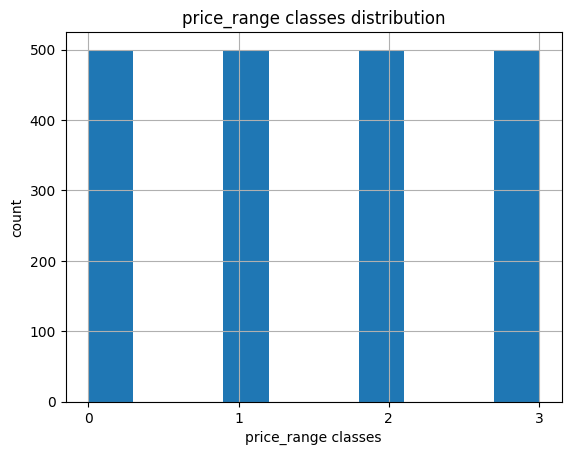

In [30]:
df["price_range"].hist()
plt.ylabel("count")
plt.xlabel("price_range classes")
plt.xticks([0, 1, 2, 3])
plt.title("price_range classes distribution")
plt.show()

as it shown the df is balanced, i.e  the count of each class in the label column is identical, and we will not need imbalanced dataset techniques like(Resampling(oversampling, undersampling),redesigning a cost function, ...)

<Figure size 1900x1900 with 0 Axes>

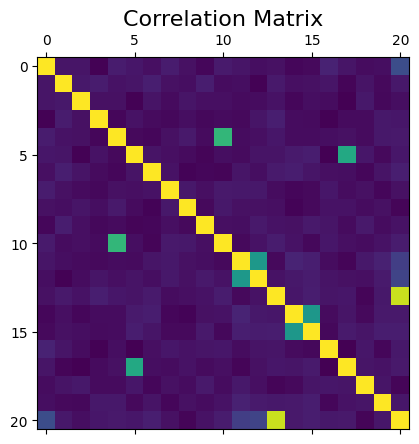

In [31]:
f = plt.figure(figsize=(19, 19))
plt.matshow(df.corr())
#cb = plt.colorbar()
#cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()

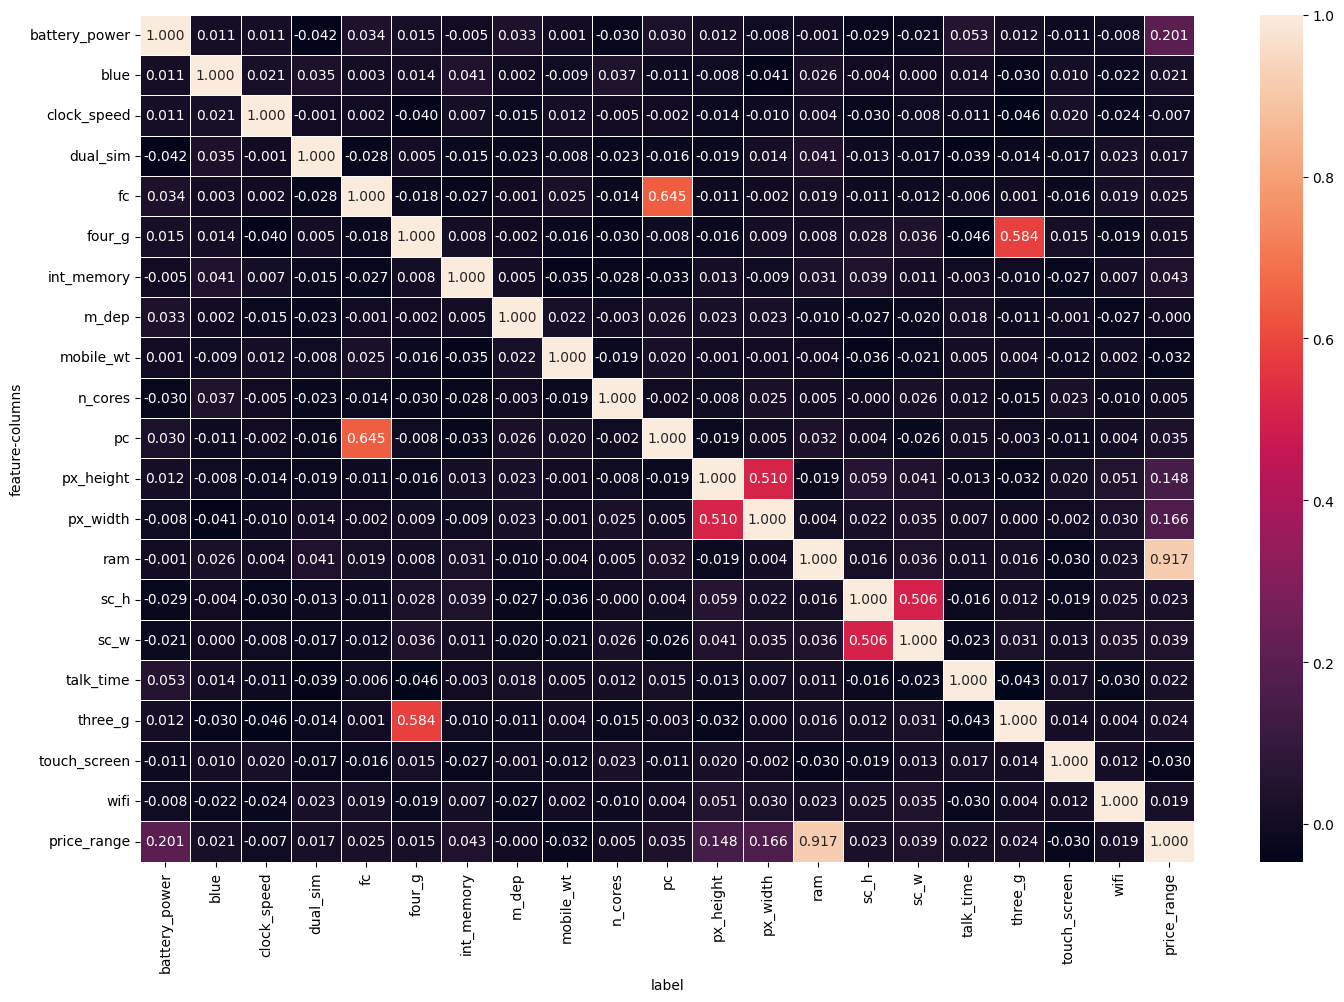

In [32]:
 #plotting the heatmap for correlation
figure(figsize=(17, 11)#, dpi=777
       )
ax = sns.heatmap(df.corr(), xticklabels=df.columns, annot=True, fmt=".3f", linewidth=.5, cbar=True)
ax.set(xlabel="label", ylabel="feature-columns")
#ax.xaxis.tick_top()
plt.show()

#### as shown in the figure above, and i didn't expect that the ram has all that mount of correlation with the price range, this surprise me, i was think that the correlation will be divided between all columns almost equally

split the label column from the feature columns

In [33]:
# label column naming it (y)
y = df["price_range"]

#feature columns naming them x
x = df.drop("price_range", axis=1)

In [34]:
# list of unique values in ram column
x.ram.value_counts().unique()

array([4, 3, 2, 1])

In [35]:
# recalculate the correlation between label and ram column
(x.ram).corr(y)

0.9171186800614708

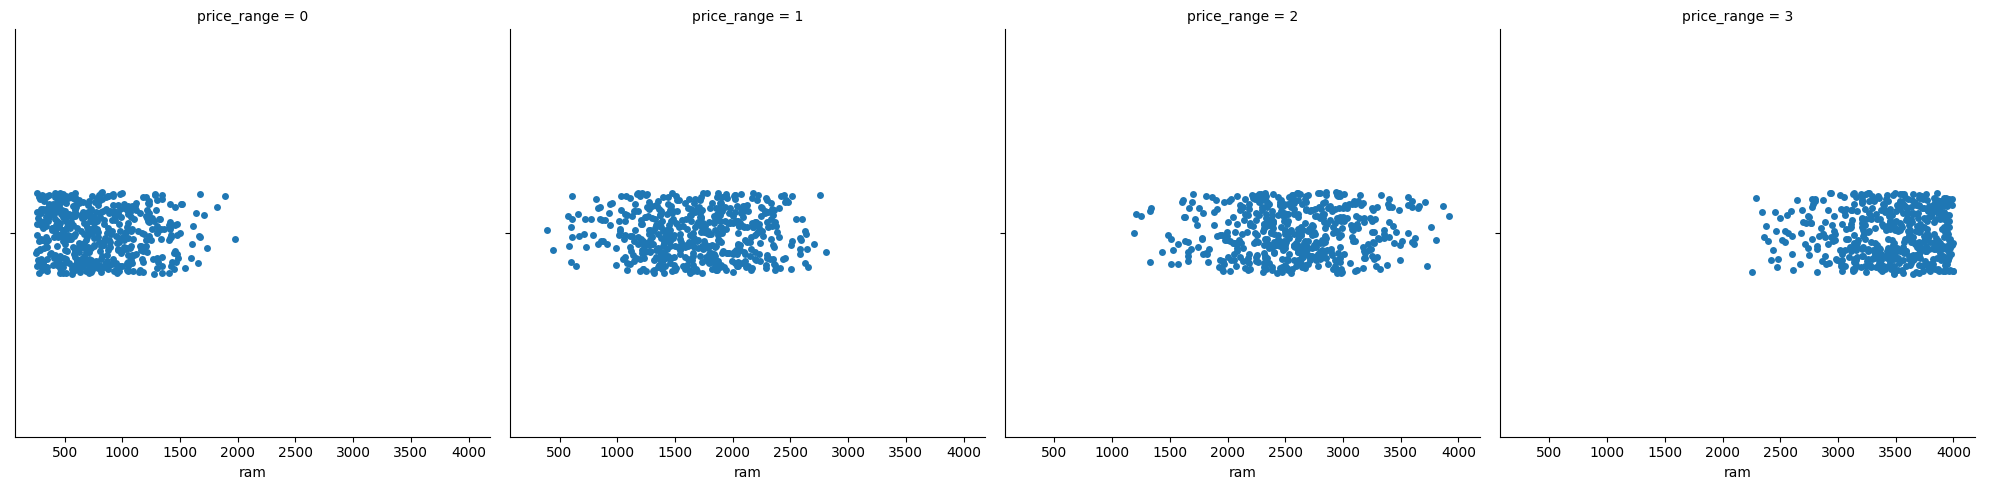

In [36]:
sns.catplot(x="ram", col=y, kind="strip", data=df)
plt.show()

In [37]:
# check number of null values in ram column
x.ram.isna().sum()

2

In [38]:
# list of unique values in ram column
x.px_width.value_counts().unique()

array([7, 6, 5, 4, 3, 2, 1])

In [39]:
# recalculate the correlation between label and ram column
(x.px_width).corr(y)

0.16609396306040197

In [40]:
# check number of null values in ram column
x.px_width.isna().sum()

2

In [41]:
# list of unique values in ram column
x.battery_power.value_counts().unique()

array([6, 5, 4, 3, 2, 1])

In [42]:
# recalculate the correlation between label and ram column
(x.battery_power).corr(y)

0.20072261211373094

In [43]:
# check number of null values in ram column
x.battery_power.isna().sum()

0

In [44]:
# list of unique values in ram column
x.px_height.value_counts().unique()

array([7, 6, 5, 4, 3, 2, 1])

In [45]:
# recalculate the correlation between label and ram column
(x.px_height).corr(y)

0.14818437385302125

In [46]:
# check number of null values in ram column
x.px_height.isna().sum()

4

In [54]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1135
px_width         1109
ram              1561
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64